In [15]:
import pandas as pd
import networkx as nx



In [5]:
import matplotlib.pyplot as plt
import matplollib.patches as mpatches
import seaborn as sns
from node2vec import Node2Vec
from sklearn.manifold import TSNE 

sns.set_style('whitegrid')
labels = [i for i in dict(g.nodes).keys()]
labels = {i:i for i in dict(g.nodes).keys()}
fig, ax = plt.subplots(figsize=(12,5))
layout = nx.spring_layout(g,iterations=50)
nx.draw_networkx_nodes(g, layout, ax = ax, labels=True)
nx.draw_networkx_edges(g, layout,  ax=ax)
_ = nx.draw_networkx_labels(g, layout, labels, ax=ax)



C:\Users\acer\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


In [16]:
df = pd.read_csv("TokohMiliter.csv")
df.head()

,Nama,Asal,Angkatan;
0,Abdul Haris Nasution,Sumatera Utara,AD;
1,Agum Gumelar,Tasikmalaya,AD;
2,Agus Suhartono,Blitar,AL;
3,Ali Sadikin,Sumedang,AL;
4,Amir machmud,Cimahi,AD;


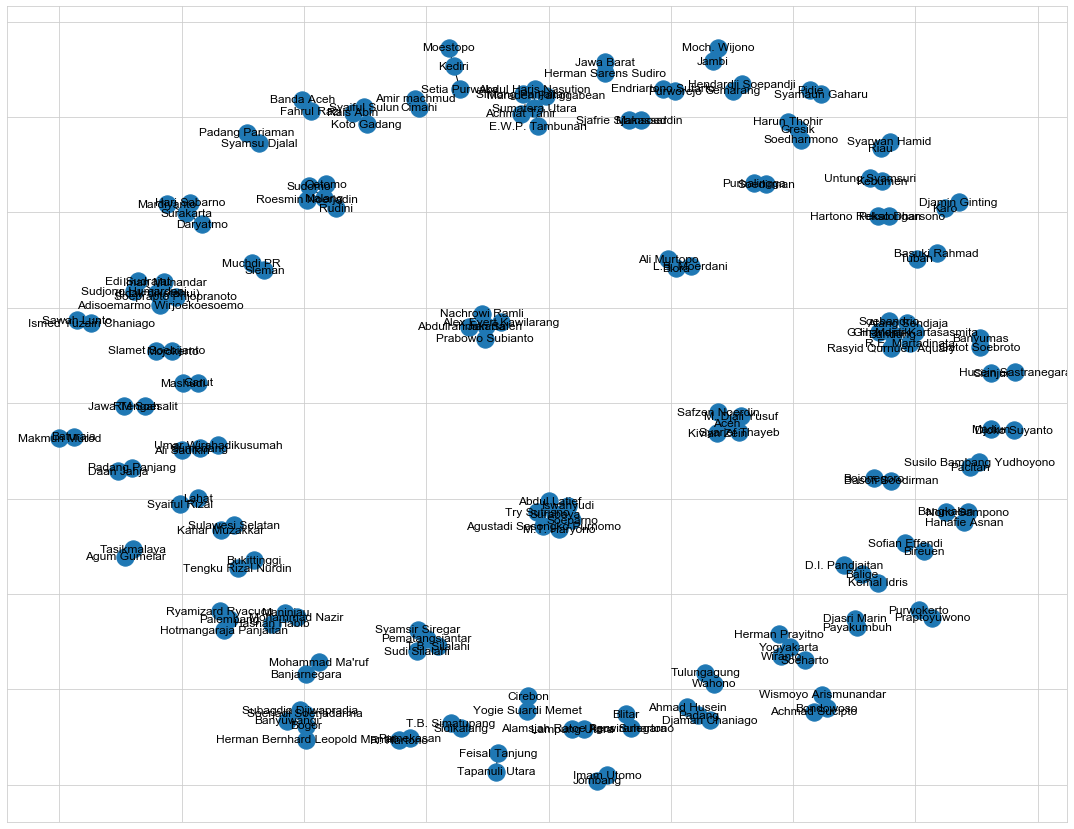

In [11]:
g = nx.from_pandas_edgelist(df, source='Nama', target='Asal')
node2vec = Node2Vec(g, dimensions=50, walk_length=16, num_walks=100, workers=4)

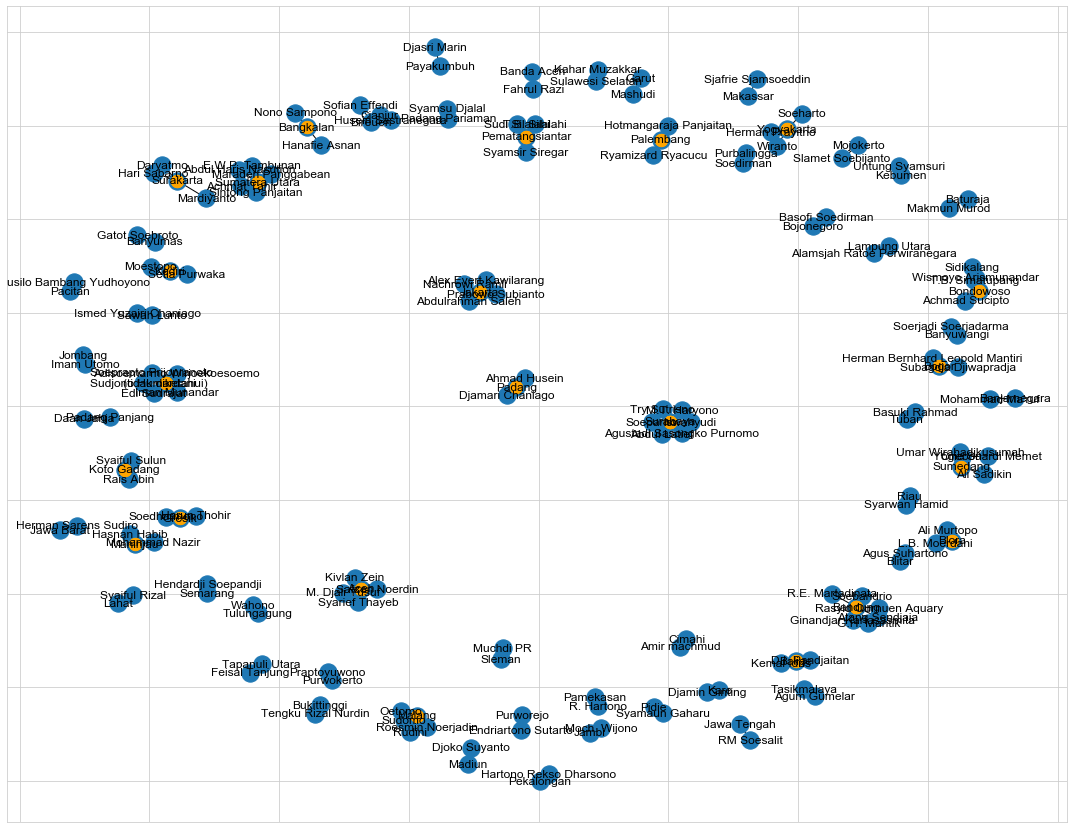

In [18]:
labels = [i for i in dict(g.nodes).keys()]
labels = {i:i for i in dict(g.nodes).keys()}

fig, ax = plt.subplots(figsize=(19,15))
layout = nx.spring_layout(g,iterations=50)
nx.draw_networkx_nodes(g, layout, ax = ax, labels = True)
nx.draw_networkx_edges(g, layout, ax = ax)
_ = nx.draw_networkx_labels(g, layout, labels, ax=ax)
kotapopuler = [person for person in df.Asal if g.degree(person) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=kotapopuler, node_color='orange', node_size=150)


In [20]:
density = nx.density(g)
print("Network density:", density)

Network density: 0.007126348228043144
